In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y= make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

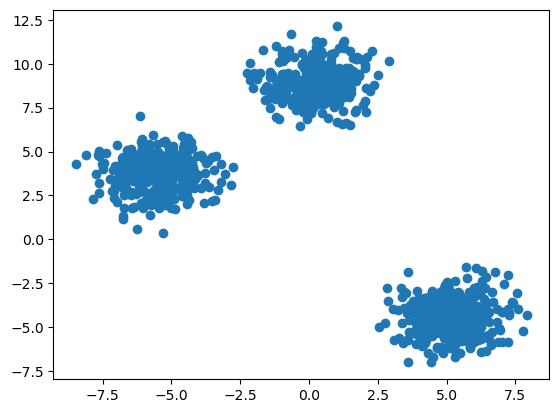

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [8]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 991.8238694516631,
 853.7528135404275,
 756.5873713517506,
 665.429332704473,
 577.3478524514392,
 534.7431163635287]

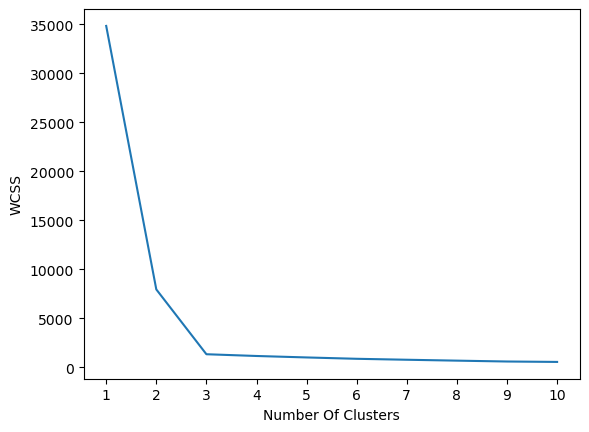

In [9]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [11]:
y_train_labels = kmeans.fit_predict(X_train)

In [12]:
y_train_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1,

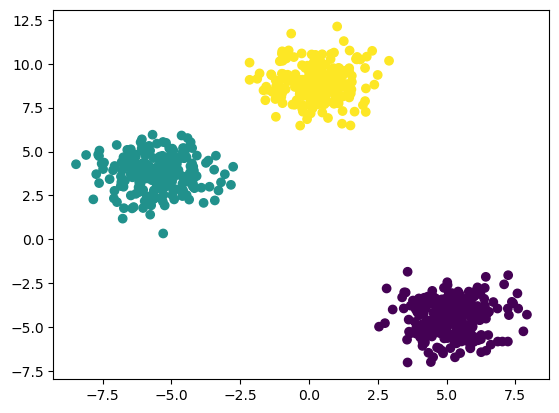

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train_labels)

In [14]:
y_test_labels = kmeans.fit_predict(X_test)

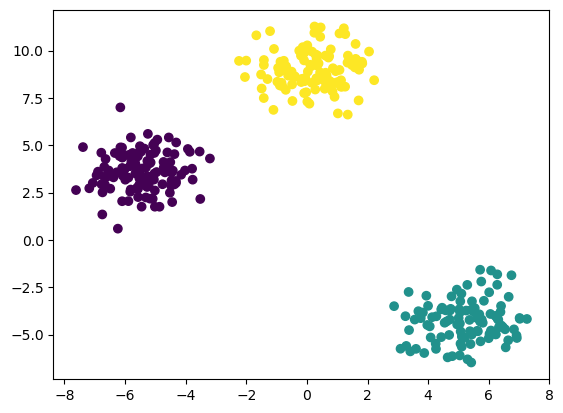

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

# Automatic Find Clusters Value:-

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator

curve=”concave” :- Means(Graph Increasing)
curve=”convex” :- Means(Graph Decreasing)

In [18]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [19]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [20]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.3319553436986524,
 0.34218333548749424,
 0.3404009432003531,
 0.34235290295992404,
 0.33831370244132897]

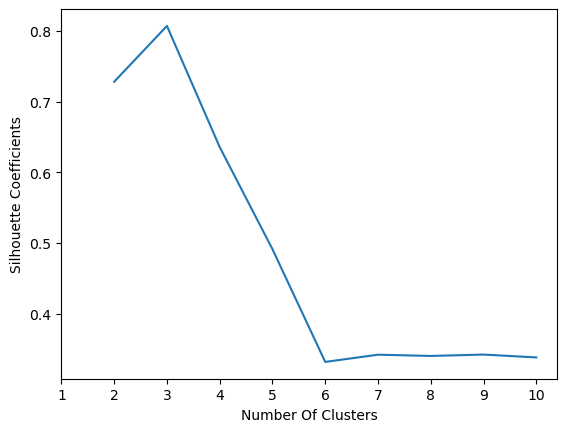

In [21]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel("Number Of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()